In [ ]:
import pandas as pd


In [8]:
from google.colab import files
uploaded = files.upload()

Saving weatherHistory.csv to weatherHistory (1).csv


In [9]:
# Load the uploaded CSV
df = pd.read_csv("weatherHistory.csv")

# Display the first 5 rows
df.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

/tmp/ipython-input-11-3514498611.py:2: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  df['Formatted Date'] = pd.to_datetime(df['Formatted Date'])


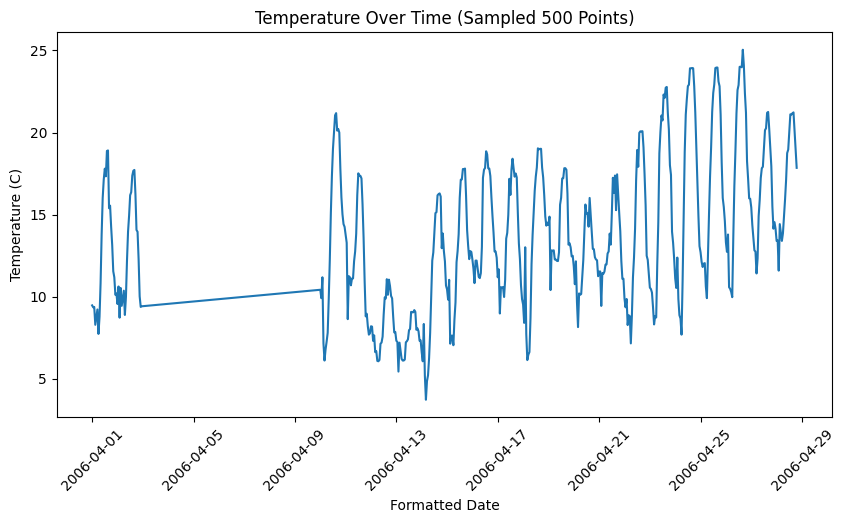

In [11]:
# Convert 'Formatted Date' to datetime
df['Formatted Date'] = pd.to_datetime(df['Formatted Date'])

plt.figure(figsize=(10, 5))
sns.lineplot(data=df[:500], x='Formatted Date', y='Temperature (C)')
plt.title("Temperature Over Time (Sampled 500 Points)")
plt.xticks(rotation=45)
plt.show()

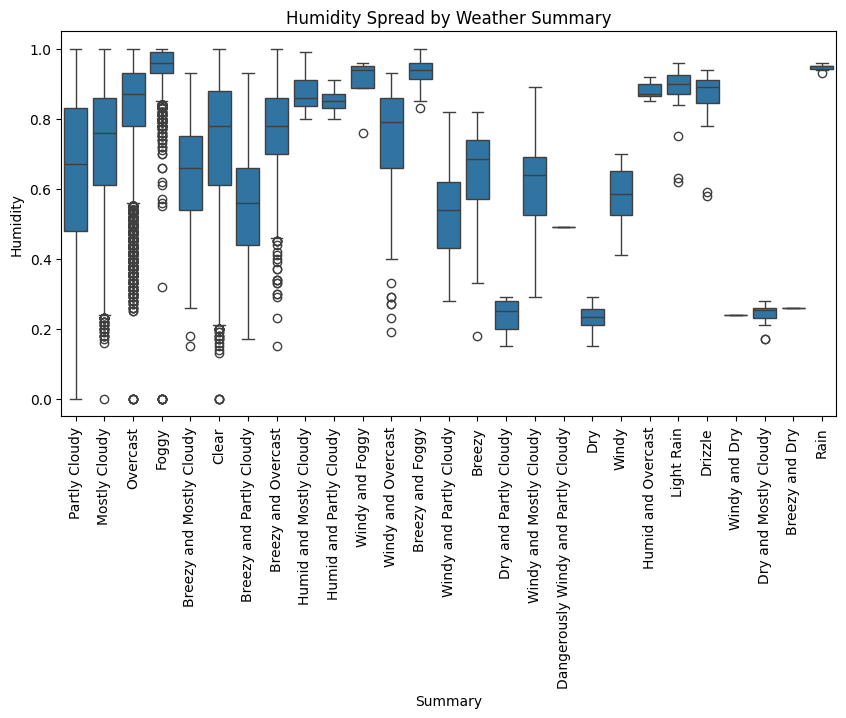

In [12]:
plt.figure(figsize=(10, 5))
sns.boxplot(x='Summary', y='Humidity', data=df)
plt.title("Humidity Spread by Weather Summary")
plt.xticks(rotation=90)
plt.show()

In [13]:
# Check for missing values
df.isnull().sum()

# Fill missing values in 'Precip Type' with the mode
df['Precip Type'].fillna(df['Precip Type'].mode()[0], inplace=True)

/tmp/ipython-input-13-3788845295.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Precip Type'].fillna(df['Precip Type'].mode()[0], inplace=True)


In [14]:
Q1 = df['Temperature (C)'].quantile(0.25)
Q3 = df['Temperature (C)'].quantile(0.75)
IQR = Q3 - Q1

# Identify outliers
outliers = df[(df['Temperature (C)'] < (Q1 - 1.5 * IQR)) | (df['Temperature (C)'] > (Q3 + 1.5 * IQR))]

# Remove outliers
df_clean = df[~df.index.isin(outliers.index)]

In [15]:
# Drop irrelevant columns
df_reduced = df_clean.drop(['Daily Summary', 'Loud Cover', 'Apparent Temperature (C)'], axis=1)

# Sample 50% of the data
df_sample = df_reduced.sample(frac=0.5, random_state=1)

In [16]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_sample[['Temperature (C)', 'Humidity', 'Wind Speed (km/h)']] = scaler.fit_transform(
    df_sample[['Temperature (C)', 'Humidity', 'Wind Speed (km/h)']]
)

# Discretize temperature into 3 bins: Cold, Moderate, Hot
df_sample['Temp Category'] = pd.cut(df_sample['Temperature (C)'], bins=3, labels=['Cold', 'Moderate', 'Hot'])

In [17]:
df_sample.info()
df_sample.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 48204 entries, 21452 to 9039
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   Formatted Date          48204 non-null  object  
 1   Summary                 48204 non-null  object  
 2   Precip Type             48204 non-null  object  
 3   Temperature (C)         48204 non-null  float64 
 4   Humidity                48204 non-null  float64 
 5   Wind Speed (km/h)       48204 non-null  float64 
 6   Wind Bearing (degrees)  48204 non-null  float64 
 7   Visibility (km)         48204 non-null  float64 
 8   Pressure (millibars)    48204 non-null  float64 
 9   Temp Category           48204 non-null  category
dtypes: category(1), float64(6), object(3)
memory usage: 3.7+ MB


,Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars)
count,48204.000000,48204.000000,48204.000000,48204.000000,48204.000000,48204.000000
mean,0.501231,0.733997,0.169105,187.239482,10.364399,1002.589189
std,0.170574,0.195823,0.108045,107.154770,4.176701,119.553681
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.372607,0.600000,0.091276,117.000000,8.420300,1011.860000
50%,0.502430,0.780000,0.156329,180.000000,10.046400,1016.440000
75%,0.624021,0.890000,0.221130,290.000000,14.812000,1021.060000
max,1.000000,1.000000,1.000000,359.000000,16.100000,1046.380000


In [18]:
print("Temperature - Min:", df_sample['Temperature (C)'].min())
print("Max:", df_sample['Temperature (C)'].max())
print("Mean:", df_sample['Temperature (C)'].mean())
print("Median:", df_sample['Temperature (C)'].median())
print("Mode:", df_sample['Temperature (C)'].mode()[0])

Temperature - Min: 0.0
Max: 0.9999999999999999
Mean: 0.5012311041326042
Median: 0.5024298323911534
Mode: 0.41654269562630164


In [19]:
range_temp = df_sample['Temperature (C)'].max() - df_sample['Temperature (C)'].min()
iqr_temp = df_sample['Temperature (C)'].quantile(0.75) - df_sample['Temperature (C)'].quantile(0.25)

print("Range:", range_temp)
print("IQR:", iqr_temp)
print("Variance:", df_sample['Temperature (C)'].var())
print("Std Dev:", df_sample['Temperature (C)'].std())

Range: 0.9999999999999999
IQR: 0.2514132698601607
Variance: 0.029095585552371392
Std Dev: 0.1705742816264263


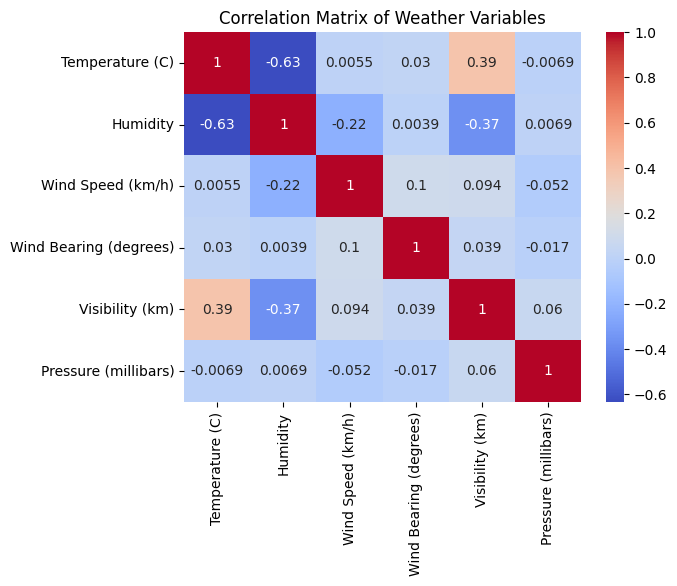

In [20]:
corr_matrix = df_sample.select_dtypes(include='number').corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix of Weather Variables")
plt.show()